## AIRCRAFT ANALYSIS-AVIATION SAFETY INSIGHTS from U.S Aviation Accident Data


Author: Sharon Kipruto


#### Introduction

Skysafe Analytics Ltd. is expanding into the Aviation industry. For this reason they need to make good decisions on acquiring and operating airplanes for commercial and private enterprises using the recomendations given by us. As they do not know the potential risks involved in the aviation industry, we need to analyze for them the Aviation Data from U.S National Transportation Safety Board(NTSB) to give recomendations.
We will do so by exploring, cleaning and studying the Data and use our findings to form actionable insights to the new Aviation department in Skysafe Analytics Ltd. This advice should help them pick safer aircrafts that will kickstart their new business venture to success.


### DATA UNDERSTANDING

This project relies from data from [Kaggle](https://www.kaggle.com/datasets/drealbash/aviation-accident-from-1919-2023?select=aviation-accident-data-2023-05-16.csv)  from the US National Transportation Safety Board(NTSB) For the full context and key questions, refer to [README]()

## 1. DATA EXPLORATION

We load the dataset to understand its structure, contents, size and summary.

In [2974]:
#importing relevant data Science libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.available
plt.style.use('ggplot')

In [2975]:
#importing data into dataframe

df=pd.read_csv('./Data/AviationData.csv' , encoding='Latin1', low_memory=False)

#display the first 5 rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [2976]:
#display the last 5 rows
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [2977]:
#display the shape of the data to check number of rows and columns in the dataset

df.shape

(88889, 31)

In [2978]:
#display the available columns of the dataset
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [2979]:
#checking summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [2980]:
#display the descriptive statististic to get the overview of the distributions and transform to make it readable
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


In [2981]:
#check for number of unique values in the dataset

print(f'The number of unique values in each column is:')


df.nunique()

The number of unique values in each column is:


Event.Id                  87951
Investigation.Type            2
Accident.Number           88863
Event.Date                14782
Location                  27758
Country                     219
Latitude                  25589
Longitude                 27154
Airport.Code              10375
Airport.Name              24871
Injury.Severity             109
Aircraft.damage               4
Aircraft.Category            15
Registration.Number       79105
Make                       8237
Model                     12318
Amateur.Built                 2
Number.of.Engines             7
Engine.Type                  13
FAR.Description              31
Schedule                      3
Purpose.of.flight            26
Air.carrier               13590
Total.Fatal.Injuries        125
Total.Serious.Injuries       50
Total.Minor.Injuries         57
Total.Uninjured             379
Weather.Condition             4
Broad.phase.of.flight        12
Report.Status             17075
Publication.Date           2924
dtype: i

In [2982]:
#check for duplicates

duplicates=df.duplicated().sum()

print(f'The number of duplicated values is:{duplicates}')

The number of duplicated values is:0


In [2983]:
#check missing values

df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [2984]:
#sort percentage of null values from the highest

(df.isna().sum()/len(df)*100).sort_values(ascending=False)

Schedule                  85.845268
Air.carrier               81.271023
FAR.Description           63.974170
Aircraft.Category         63.677170
Longitude                 61.330423
Latitude                  61.320298
Airport.Code              43.469946
Airport.Name              40.611324
Broad.phase.of.flight     30.560587
Publication.Date          15.492356
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Fatal.Injuries      12.826109
Engine.Type                7.961615
Report.Status              7.178616
Purpose.of.flight          6.965991
Number.of.Engines          6.844491
Total.Uninjured            6.650992
Weather.Condition          5.053494
Aircraft.damage            3.593246
Registration.Number        1.481623
Injury.Severity            1.124999
Country                    0.254250
Amateur.Built              0.114750
Model                      0.103500
Make                       0.070875
Location                   0.058500
Event.Date                 0

**Conclusion on the Data Exploration**

The aviation dataset contains a mix of numerical and categorical data relating to the aviation accidents. The data has no duplicated values but has alot of missing values in some columns hence it will need some cleaning.




## 2.DATA CLEANING

In this section we will focus on cleaning the data by converting data to their correct types for consistency, cleaning the columns for readability, dealing with null values (categorical and numerical values) for reliability of the analysis.

#### 2.1 Convert the dates to Datetime 

The `event_Date` and `Publication_Date` are both stored under Object data type which is not the corect type for dates,we need to convert into proper Datetime format to enable time-based analysis.

In [2985]:
#check how the dates were before
df.loc[:, ['Event.Date', 'Publication.Date']].head()

,Event.Date,Publication.Date
0,1948-10-24,NaN
1,1962-07-19,19-09-1996
2,1974-08-30,26-02-2007
3,1977-06-19,12-09-2000
4,1979-08-02,16-04-1980


In [2986]:
#convert Event.Date and publication.date to date time since they are scored as objects

df["Event.Date"] = pd.to_datetime(df["Event.Date"], errors="coerce")
df["Publication.Date"] = pd.to_datetime(df["Publication.Date"], errors="coerce")

In [2987]:
#confirm the changes
df.loc[:, ['Event.Date', 'Publication.Date']].head()

,Event.Date,Publication.Date
0,1948-10-24,NaT
1,1962-07-19,1996-09-19
2,1974-08-30,2007-02-26
3,1977-06-19,2000-12-09
4,1979-08-02,1980-04-16


The dates have been changed accordingly.

#### 2.2 Clean the columns

In [2988]:
#check the columns
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

**a) standadize column names** 

In [2989]:
#clean the column names for easy access and readability
#strip spaces,make it title case ,replace spaces with underscore and replace dot with underscore
df.columns=(df.columns.str.strip().str.title().str.replace(' ','_').str.replace('.','_'))

#check new column names 
df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_Damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_Of_Engines', 'Engine_Type', 'Far_Description',
       'Schedule', 'Purpose_Of_Flight', 'Air_Carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_Phase_Of_Flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

**b)Extracting new column names and adding to our dataset**

It is important to our data analysis that we derive new columns that are relevant, such as `Year` ,`Month`,`Day_of_Week` , `Total_Injuries` and `Aircraft type`.Also we will create a column named `Decade` that will hold 10 year intervals that will be relavant when analysing the trends overtime.

In [2990]:
#Extract year, month and day_of_week from the ['Event_Date] column for easy analysis
df['Year']=df['Event_Date'].dt.year
df['Month']=df['Event_Date'].dt.month
df['Day_of_Week']=df['Event_Date'].dt.day_name()


In [2991]:
#preview after extracting the year day of week and month
df.loc[:, ['Event_Date','Year','Month','Day_of_Week']].head()

,Event_Date,Year,Month,Day_of_Week
0,1948-10-24,1948,10,Sunday
1,1962-07-19,1962,7,Thursday
2,1974-08-30,1974,8,Friday
3,1977-06-19,1977,6,Sunday
4,1979-08-02,1979,8,Thursday


In [2992]:
# Create column for 10-year intervals
df['Decade'] = (df['Year'] // 10) * 10

In [2993]:
df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_Damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_Of_Engines', 'Engine_Type', 'Far_Description',
       'Schedule', 'Purpose_Of_Flight', 'Air_Carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_Phase_Of_Flight', 'Report_Status',
       'Publication_Date', 'Year', 'Month', 'Day_of_Week', 'Decade'],
      dtype='object')

Create a column for `Total Injuries` that summarises all the Injuries occured.

In [2994]:

df['Total_Injuries'] = df['Total_Serious_Injuries'] + df['Total_Minor_Injuries']

#preview after creating the Total_Injuries column
df.loc[:,['Total_Serious_Injuries','Total_Minor_Injuries','Total_Injuries']].head()

,Total_Serious_Injuries,Total_Minor_Injuries,Total_Injuries
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,NaN,NaN,NaN
3,0.0,0.0,0.0
4,2.0,NaN,NaN


The `make` and `model` of the Aircraft is an important Variable to help determine the aircraft to purchase. For the column with `Model` and `Make` of the aircrafts we will combine to form new column `Aircraft_Type` that can be used in our analysis later.

In [2995]:
#first lets look at the first 5 rows column mentioned
df.loc[0:5,['Make','Model']]

,Make,Model
0,Stinson,108-3
1,Piper,PA24-180
2,Cessna,172M
3,Rockwell,112
4,Cessna,501
5,Mcdonnell Douglas,DC9


In [2996]:
#check for number of missing values in the columns mentioned
print(df['Model'].isnull().sum())
print(df['Make'].isna().sum())

92
63


In [2997]:
#standize the value for Make 
df['Make']=df['Make'].str.upper()


In [2998]:
#minimize errors during concatenation convert type to string
df['Make']=df['Make'].astype(str)
df['Model']=df['Model'].astype(str)

#combine to make new column 'Aircraft_Type'
df['Aircraft_Type']=df['Make']+ ' '+ df['Model']

#replace 'nan' string values with Nan, since some values are missing in both columns
df['Aircraft_Type']=df['Aircraft_Type'].replace('nan nan',np.nan)


In [2999]:
#preview if the column is added and has a combination of make and Model
df.loc[:,['Make','Model','Aircraft_Type']].head()

,Make,Model,Aircraft_Type
0,STINSON,108-3,STINSON 108-3
1,PIPER,PA24-180,PIPER PA24-180
2,CESSNA,172M,CESSNA 172M
3,ROCKWELL,112,ROCKWELL 112
4,CESSNA,501,CESSNA 501


#### 2.3 Dealing with missing values

In [3000]:
#sort the percentage of null values in descending order
(df.isna().sum()/len(df)*100).sort_values(ascending=False)

Schedule                  85.845268
Air_Carrier               81.271023
Far_Description           63.974170
Aircraft_Category         63.677170
Longitude                 61.330423
Latitude                  61.320298
Airport_Code              43.469946
Airport_Name              40.611324
Broad_Phase_Of_Flight     30.560587
Total_Injuries            15.809605
Publication_Date          15.492356
Total_Serious_Injuries    14.073732
Total_Minor_Injuries      13.424608
Total_Fatal_Injuries      12.826109
Engine_Type                7.961615
Report_Status              7.178616
Purpose_Of_Flight          6.965991
Number_Of_Engines          6.844491
Total_Uninjured            6.650992
Weather_Condition          5.053494
Aircraft_Damage            3.593246
Registration_Number        1.481623
Injury_Severity            1.124999
Country                    0.254250
Amateur_Built              0.114750
Location                   0.058500
Aircraft_Type              0.048375
Make                       0

**A) CATEGORICAL DATA**

In [3001]:
#drop full columns with above 60% null values and seem unimportant in our analysis

df.drop(['Schedule','Air_Carrier','Far_Description','Publication_Date','Longitude','Latitude'], axis=1, inplace=True)



In [3002]:
#drop the rows of columns with missing values that seem important for our analysis to keep 
df.dropna(subset=['Location','Country','Aircraft_Type'], inplace=True)

Now for the rest of the categorical values of data we will fill the null values with 'Unknown'

In [3003]:
#fill 'unknown' to null values in some categorial data columns
categorical_cols=['Airport_Code', "Airport_Name","Engine_Type", "Report_Status",
    "Aircraft_Damage",'Injury_Severity','Aircraft_Category','Registration_Number','Amateur_Built','Weather_Condition']
for col in categorical_cols:
    df[col]=df[col].fillna('Unknown')

`Weather_Condition` column requires more manipulation to merge the 'Unk' ,'UNK' values with 'Unknown'

In [3004]:
df['Weather_Condition'].value_counts()

VMC        77074
IMC         5961
Unknown     4448
UNK          825
Unk          262
Name: Weather_Condition, dtype: int64

In [3005]:
#replace the values
df['Weather_Condition'].replace('Unk','Unknown', inplace=True)
df['Weather_Condition'].replace('UNK','Unknown', inplace=True)

In [3006]:
#check if replaced
df['Weather_Condition'].value_counts()

VMC        77074
IMC         5961
Unknown     5535
Name: Weather_Condition, dtype: int64

For the `Purpose_Of_Flight`, it will be important to understand  if commercial and private flights have different risks later. I will fill it with the most appearing value

In [3007]:
#check value counts to detect the most frequent
print(df['Purpose_Of_Flight'].value_counts())

#fill missing values with 'Personal'
df['Purpose_Of_Flight'].fillna('Personal', inplace=True)



Personal                     49384
Instructional                10587
Unknown                       6677
Aerial Application            4712
Business                      4004
Positioning                   1628
Other Work Use                1259
Ferry                          804
Aerial Observation             785
Public Aircraft                718
Executive/corporate            549
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      104
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose_Of_Flight, dtype: int64


Now lets clean `Broad phase of Flight` column by filling the `Nan` values with the mode 

In [3008]:
print(df['Broad_Phase_Of_Flight'].mode())

#fill null values 
df['Broad_Phase_Of_Flight'].fillna((df['Broad_Phase_Of_Flight'].mode()[0]),inplace=True)

0    Landing
dtype: object


**B) NUMERICAL DATA**

Now when dealing with numerical values we need to observe what the numbers represent, In this case of injuries while assuming the best case scenario: we have assumed that the columns with null values for `Injured/injuries` means that no injuries were observed or reported hence filling with '0'

In [3009]:
#check the columns mentioned
df.loc[:,["Total_Fatal_Injuries", "Total_Serious_Injuries",
           "Total_Minor_Injuries", "Total_Uninjured",'Total_Injuries']].head()

,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Total_Injuries
0,2.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0,0.0
2,3.0,NaN,NaN,NaN,NaN
3,2.0,0.0,0.0,0.0,0.0
4,1.0,2.0,NaN,0.0,NaN


In [3010]:
#fill in 0 or median to null values in columns with numerical value and convert type to interger

num_cols= ["Total_Fatal_Injuries", "Total_Serious_Injuries",
           "Total_Minor_Injuries", "Total_Uninjured",'Total_Injuries']

for col in num_cols:
    if 'Injuries' in col or col=='Total_Uninjured':
        df[col]=df[col].fillna(0)
    else: 
        df[col]=df[col].fillna(df[col].median())
    df[col]=df[col].astype(int)

In [3011]:
#check if type has been converted
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88570 entries, 0 to 88888
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Total_Fatal_Injuries    88570 non-null  int32
 1   Total_Serious_Injuries  88570 non-null  int32
 2   Total_Minor_Injuries    88570 non-null  int32
 3   Total_Uninjured         88570 non-null  int32
 4   Total_Injuries          88570 non-null  int32
dtypes: int32(5)
memory usage: 2.4 MB


Next, looking at the `'Number_of_Engines`, these values will be important to know if aircrafts with single or multiple Engines are riskier.

In [3012]:
#check value counts to see most frequent
print(df['Number_Of_Engines'].value_counts(dropna=False))

#fill the missing values of the Number of Engines with the mode[0]the first most frequent value
df['Number_Of_Engines'].fillna((df['Number_Of_Engines'].mode()[0]),inplace=True)

#convert dtype to integer
df['Number_Of_Engines']=df['Number_Of_Engines'].astype(int)

1.0    69433
2.0    11004
NaN     6008
0.0     1220
3.0      476
4.0      425
8.0        3
6.0        1
Name: Number_Of_Engines, dtype: int64


In [3013]:
#recheck missing values
df.isna().sum().sort_values(ascending=False)

Aircraft_Type             0
Amateur_Built             0
Investigation_Type        0
Accident_Number           0
Event_Date                0
Location                  0
Country                   0
Airport_Code              0
Airport_Name              0
Injury_Severity           0
Aircraft_Damage           0
Aircraft_Category         0
Registration_Number       0
Make                      0
Model                     0
Number_Of_Engines         0
Total_Injuries            0
Engine_Type               0
Purpose_Of_Flight         0
Total_Fatal_Injuries      0
Total_Serious_Injuries    0
Total_Minor_Injuries      0
Total_Uninjured           0
Weather_Condition         0
Broad_Phase_Of_Flight     0
Report_Status             0
Year                      0
Month                     0
Day_of_Week               0
Decade                    0
Event_Id                  0
dtype: int64

We  have eliminated all missing values succesfully. 

#### 2.4 Droping columns that are irrelevant to our analysis

Since our analysis is on giving recommendation on what aircraft is the more safer option for purchase and operation, we feel that some columns may be misleading, redundant or irrelevant for our analysis. The following columns did not make the cut:
* Event_Id                    
* Accident_number             
* Registration Number
* Report status
* Investigation type

In [3014]:
#drop columns that are not relevant to our analysis
df.drop(['Event_Id','Accident_Number','Investigation_Type','Registration_Number','Report_Status'], axis=1, inplace=True)

In [3015]:
#recheck the final shape we will work with
df.shape


(88570, 26)

In [3016]:
#final columns we are working with
df.columns

Index(['Event_Date', 'Location', 'Country', 'Airport_Code', 'Airport_Name',
       'Injury_Severity', 'Aircraft_Damage', 'Aircraft_Category', 'Make',
       'Model', 'Amateur_Built', 'Number_Of_Engines', 'Engine_Type',
       'Purpose_Of_Flight', 'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Broad_Phase_Of_Flight', 'Year', 'Month', 'Day_of_Week', 'Decade',
       'Total_Injuries', 'Aircraft_Type'],
      dtype='object')

In [3017]:
df.head()

,Event_Date,Location,Country,Airport_Code,Airport_Name,Injury_Severity,Aircraft_Damage,Aircraft_Category,Make,Model,...,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_Phase_Of_Flight,Year,Month,Day_of_Week,Decade,Total_Injuries,Aircraft_Type
0,1948-10-24,"MOOSE CREEK, ID",United States,Unknown,Unknown,Fatal(2),Destroyed,Unknown,STINSON,108-3,...,0,0,Unknown,Cruise,1948,10,Sunday,1940,0,STINSON 108-3
1,1962-07-19,"BRIDGEPORT, CA",United States,Unknown,Unknown,Fatal(4),Destroyed,Unknown,PIPER,PA24-180,...,0,0,Unknown,Unknown,1962,7,Thursday,1960,0,PIPER PA24-180
2,1974-08-30,"Saltville, VA",United States,Unknown,Unknown,Fatal(3),Destroyed,Unknown,CESSNA,172M,...,0,0,IMC,Cruise,1974,8,Friday,1970,0,CESSNA 172M
3,1977-06-19,"EUREKA, CA",United States,Unknown,Unknown,Fatal(2),Destroyed,Unknown,ROCKWELL,112,...,0,0,IMC,Cruise,1977,6,Sunday,1970,0,ROCKWELL 112
4,1979-08-02,"Canton, OH",United States,Unknown,Unknown,Fatal(1),Destroyed,Unknown,CESSNA,501,...,0,0,VMC,Approach,1979,8,Thursday,1970,0,CESSNA 501


**DATA CLEANING CONCLUSION**

The Aviation Dataset has been thoroughly cleaned and prepared for exportation. The final dataset we will be working with has 26 columns and 88570 rows of data. Key actions included in this section were:
* standardizing data
* dealing with missing values
* deriving columns needed for analysis 
* removing irrelevant columns

Our Dataset is now ready for export and Exploratory Data Analysis to identify the low-risk aircrafts.

## 3. EXPORT CLEANED DATA FOR TABLEAU

In [ ]:
#Export new cleaned dataframe to a new csv File 
df.to_csv('Data/Cleaned_Accident_Data.csv',index=False)


## 4. EXPLORATORY DATA ANALYSIS


The next part is essential to every project where we detect and investigate the dataset's main characteristics and study patterns with visualizations to answer the following questions:
 1. Which aircrafts has the highest and lowest accidents,injuries and fatalities?

 2. Does number of engines in an aircraft impact accidents?

 3. Which aircrafts are best used for private and commercial flights?



We will explore accident frequencies,counts and impact of type of aircraft, number of Engines, Purpose of flight to cater for SkySafe's goal to identify aircrafts with the least risks for acquisition and .

To answer the first question we look at the following plots: ***Which aircrafts has the highest and lowest accidents,injuries and fatalities?***


* **Accident trends overtime by Aircraft Type**

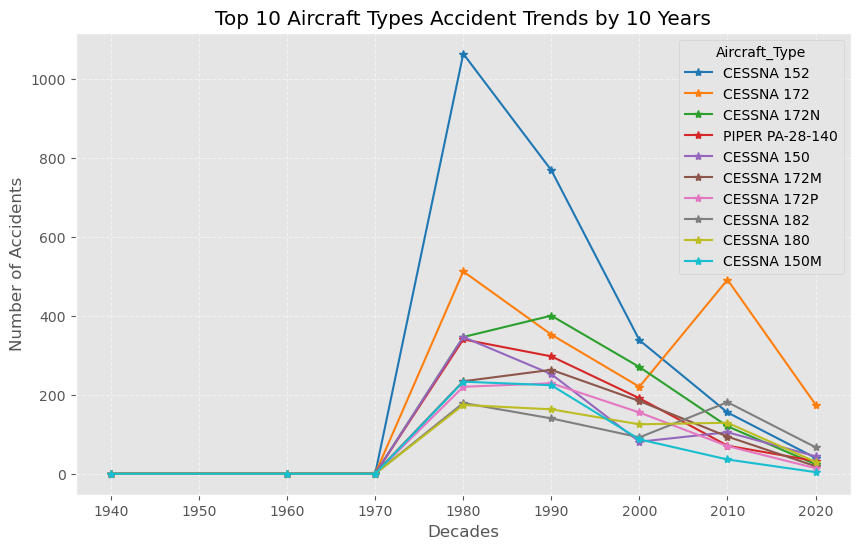

In [3019]:

# Crosstab to count accidents by year and aircraft type
cross_high = pd.crosstab(df['Decade'], df['Aircraft_Type'])

# Keep only top 10 aircraft
top_10_types = df['Aircraft_Type'].value_counts().nlargest(10).index
pivot_top_10 = cross_high[top_10_types]


#Plotting
fig,ax=plt.subplots(figsize=(10,6))

# Plot top 5 aircraft types
pivot_top_10.plot(ax=ax ,kind='line', marker='*',colormap='tab10')
ax.set_title("Top 10 Aircraft Types Accident Trends by 10 Years")
ax.set_xlabel("Decades")
ax.set_ylabel("Number of Accidents")
ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig('Images/Aircraft&Accident_trends.png')
plt.show()


This analysis shows that the Cessna aircraft types especially Cessna 152 & 172 has the highest number of accidents with peak in 1980s. while the Piper PA-28-161 seems to have low accidents over the decades.
Although, overtime the accident counts have declined steadily across all aircraft types especially after the 2000s hence suggesting improvements in safety measures in aviation. 

* **Aircraft type  with most Injuries**

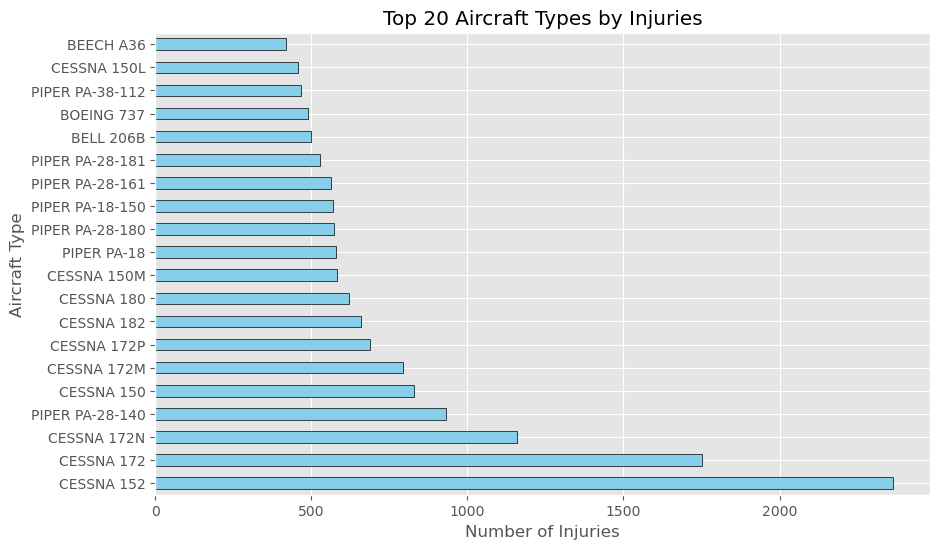

In [3020]:
#top 20 aircraft value counts by Injuries
accident_aircraft= df['Aircraft_Type'].value_counts().nlargest(20)

#plotting
plt.figure(figsize=(10, 6))

accident_aircraft.plot(kind='barh',color='skyblue', edgecolor='black')
plt.title('Top 20 Aircraft Types by Injuries')
plt.xlabel('Number of Injuries')
plt.ylabel('Aircraft Type')

plt.savefig('Images/Aircraft&Injuries.png')
plt.show()

Still the Cessna types especially Cessna 172 & 152 dominate in injury counts while Piper family seems to have a lower count of injuries in comparison to Cessna. Although Bell 206B, report low accident counts , research shows it is an agricultural Helicopters which would not be ideal for our client. 

* **Fatal injuries Across Aircraft Types**

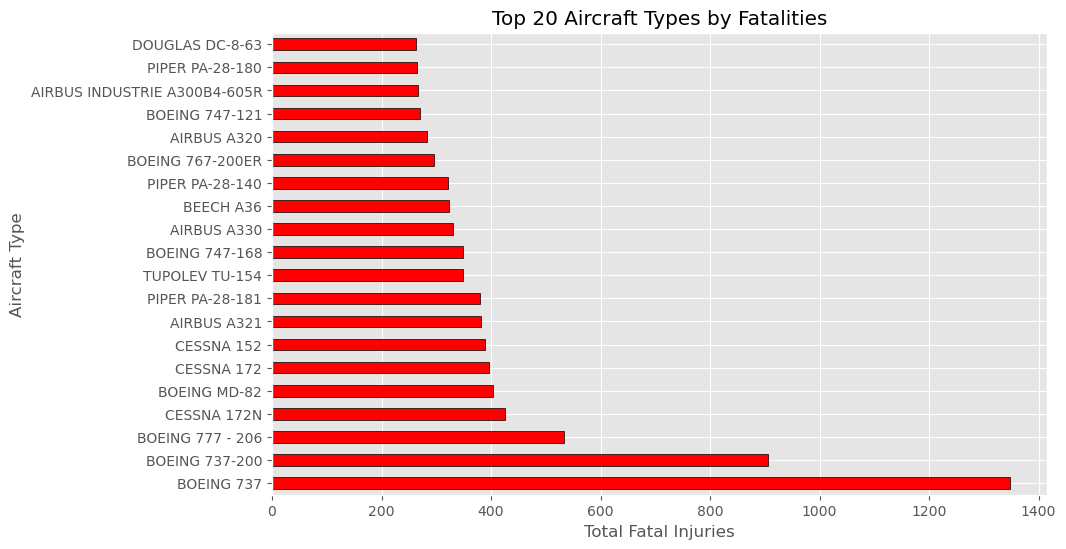

In [3021]:
fatal_df= df.groupby('Aircraft_Type')['Total_Fatal_Injuries'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))

fatal_df.plot(kind='barh',color='red', edgecolor='black')

plt.title('Top 20 Aircraft Types by Fatalities')
plt.xlabel('Total Fatal Injuries')
plt.ylabel('Aircraft Type')

plt.savefig('Images/Aircraft&fatalities_trends.png')
plt.show()

The analysis shows that Boeing 737 and Boeing 737-200 accidents resulted in the highest number of fatalities with a total exceeding 1300.

To answer the second question: ***Does number of engines in an aircraft impact accidents?***


* **Number of engine in accidents**


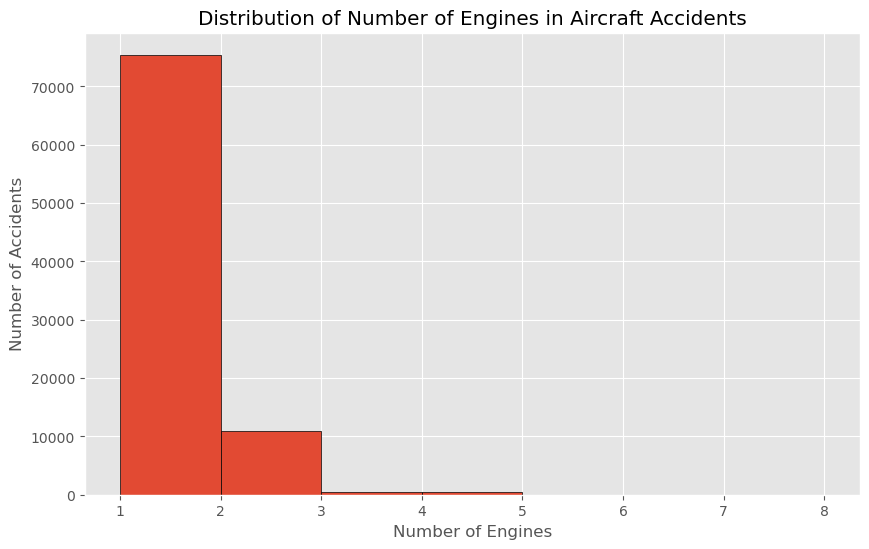

In [3022]:
Range_of_engines= len(df['Number_Of_Engines'].unique())

df['Number_Of_Engines'].plot(kind='hist', bins=range(1, Range_of_engines + 2), edgecolor='black', figsize=(10, 6))
plt.title('Distribution of Number of Engines in Aircraft Accidents')
plt.xlabel('Number of Engines')
plt.ylabel('Number of Accidents')
plt.savefig('Images/engines&Accidents_trends.png')
plt.show()


The aircrafts with single Engines caused more accidents resulting to close to 75000 Accidents ,while aircrafts with multiple engines had significantly fewer accidents especially the ones with more than 2 engines.

To answer the third Question: ***Which aircrafts are best used for private and commercial flights?***

* **Purpose of Flight**

Since our client wants both private and commercial flights we will analyze accidents trends based on purpose of flight

In [3023]:
#check the counts in Purpose of flight 
df['Purpose_Of_Flight'].value_counts()

Personal                     55521
Instructional                10587
Unknown                       6677
Aerial Application            4712
Business                      4004
Positioning                   1628
Other Work Use                1259
Ferry                          804
Aerial Observation             785
Public Aircraft                718
Executive/corporate            549
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      104
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose_Of_Flight, dtype: int64

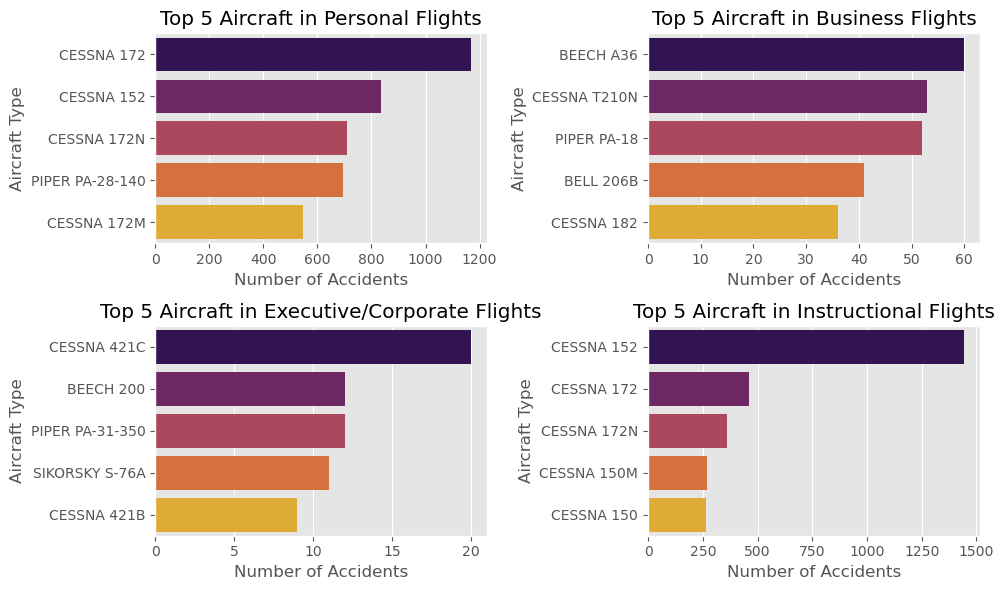

In [3024]:

# Make Purpose_Of_Flight uppercase first to standardize
df['Purpose_Of_Flight'] = df['Purpose_Of_Flight'].str.upper()

# Select relevant purposes of flight for our analysis
relevant_purpose = ['PERSONAL', 'BUSINESS', 'EXECUTIVE/CORPORATE', 'INSTRUCTIONAL']

#create a dataframe with our relevant purposes
df_relevant = df[df['Purpose_Of_Flight'].isin(relevant_purpose)]

# Group by purpose of flight and aircraft type & reset index
group_relevant = (
    df_relevant.groupby(['Purpose_Of_Flight', 'Aircraft_Type'])
    .size()
    .reset_index(name='Count')
)

# Get top 5 aircraft per purpose
top5_per_purpose = (
    group_relevant.groupby('Purpose_Of_Flight', group_keys=False)
    .apply(lambda x: x.nlargest(5, 'Count'))
)

# Plotting 2 rows * 2 columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes = axes.flatten()

for i, purpose in enumerate(relevant_purpose):
    data = top5_per_purpose[top5_per_purpose['Purpose_Of_Flight'] == purpose]
    
    if data.empty:
        axes[i].text(0.5, 0.5, "No data available", ha='center', va='center')
        axes[i].set_title(f"{purpose.title()} flights")
        axes[i].set_axis_off()
        continue
    
    sns.barplot(x='Count', y='Aircraft_Type', data=data, ax=axes[i], palette='inferno')
    axes[i].set_title(f"Top 5 Aircraft in {purpose.title()} Flights")
    axes[i].set_xlabel('Number of Accidents')
    axes[i].set_ylabel('Aircraft Type')

plt.tight_layout()
plt.savefig('Images/Aircraft&Purpose_trends.png')
plt.show()


The plots above shows that the CESSNA 172 flights has the majority of accidents in both Personal and Instructional flights, while the Cessna 421C leads in accidents on Executive/corporate Flights while Beech A36 leads in Business Flights.


## 5. CONCLUSION & RECOMENDATIONS

In the visualizations above we were 